In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [19]:
ebw_data = pd.read_csv('/content/ebw_data.csv')
ebw_data.head(73)



,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



In [5]:
ebw_data.corr()


,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


In [6]:
ebw_data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [7]:
trg = ebw_data[['Depth','Width']]
trn = ebw_data.drop(['Depth','Width'], axis=1)

In [9]:
x = ebw_data [['IF', 'VW', 'FP']].values
y = ebw_data [['Depth', 'Width']].values

In [10]:
import statsmodels.api as sm
from termcolor import colored as cl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 14)

In [12]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}

lr = lr.fit(x_train, y_train)

y_lr = lr.predict(x_test)

print(y_lr[:10])
print('')
print(y_test[:10])

[[1.11034033 1.82135731]
 [1.172803   1.75217204]
 [1.0086976  1.59364817]
 [1.47040543 2.45861401]
 [1.24947015 1.82424189]
 [0.81096183 2.05721908]
 [1.29253065 2.06012302]
 [1.24947015 1.82424189]
 [1.24947015 1.82424189]
 [1.24947015 1.82424189]]

[[1.2  1.78]
 [1.08 1.82]
 [1.08 1.72]
 [1.64 2.52]
 [1.32 1.76]
 [0.8  2.04]
 [1.2  2.  ]
 [1.2  1.86]
 [1.32 1.96]
 [1.16 1.76]]


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate

In [16]:
print("Среднеквадратичная ошибка", mean_squared_error(y_test, y_lr))
print("Средняя абсолютная ошибка", mean_absolute_error(y_test, y_lr))
print("Коэффициент детерминации", r2_score(y_test, y_lr))

Среднеквадратичная ошибка 0.006294971354047604
Средняя абсолютная ошибка 0.06651388757632354
Коэффициент детерминации 0.8850061227877254


In [ ]:
from scipy import stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

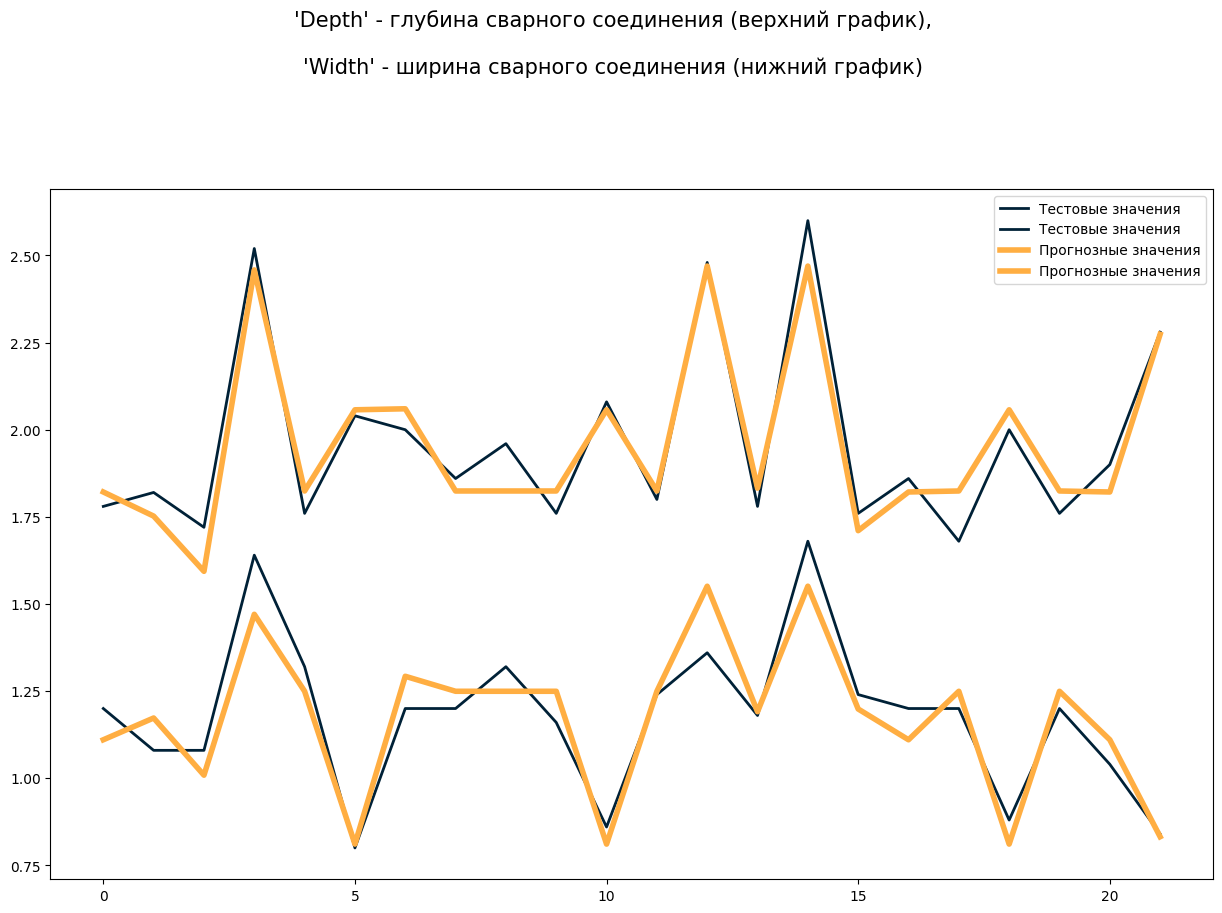

In [18]:
plt.figure(figsize = (15, 10))
plt.suptitle("'Depth' - глубина сварного соединения (верхний график),\n\n'Width' - ширина сварного соединения (нижний график)", size = 15)
plt.subplots_adjust(top = 0.80)
plt.plot(range(len(y_test)), y_test, label = 'Тестовые значения', color = '#002137', linewidth = 2)
plt.plot(range(len(y_lr)), y_lr, label = 'Прогнозные значения', color = '#ffae42', linewidth = 4)
plt.legend(loc = 'best', fontsize = 10)

